In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 249.5, 136.5, -0.5)

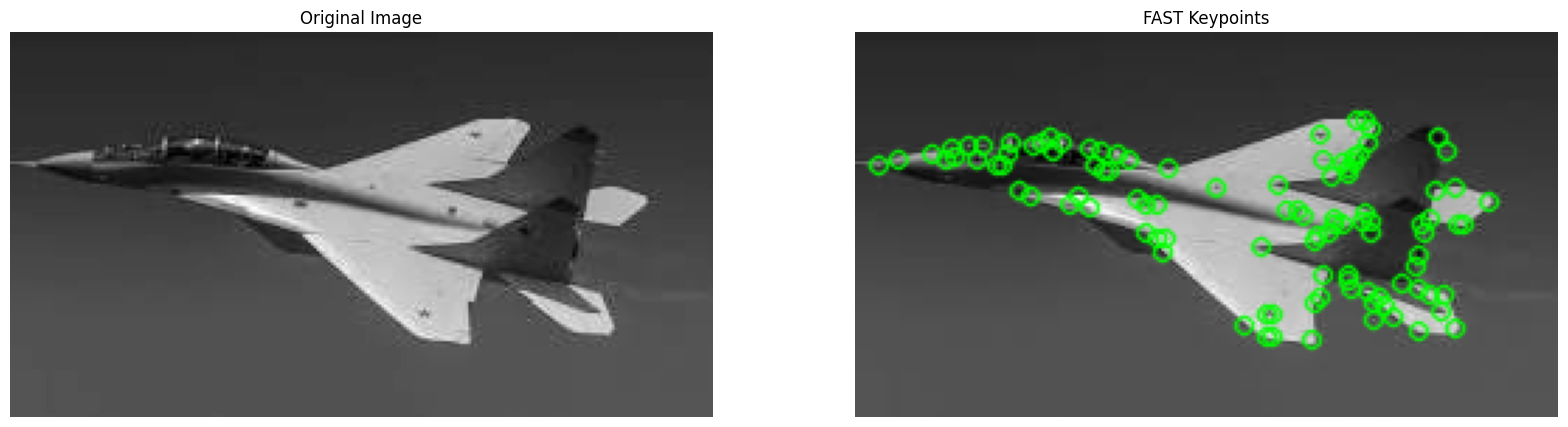

In [2]:
# Load image in grayscale
img = cv2.imread('/kaggle/input/plane-pic/download (3).jfif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Image not found.")
    exit()

# Initialize FAST detector
fast = cv2.FastFeatureDetector_create(threshold=25)

# Detect keypoints
keypoints = fast.detect(img, None)

# Draw keypoints
img_fast = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0))

# Display results
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('FAST Keypoints')
plt.imshow(img_fast, cmap='gray')
plt.axis('off')

(-0.5, 249.5, 136.5, -0.5)

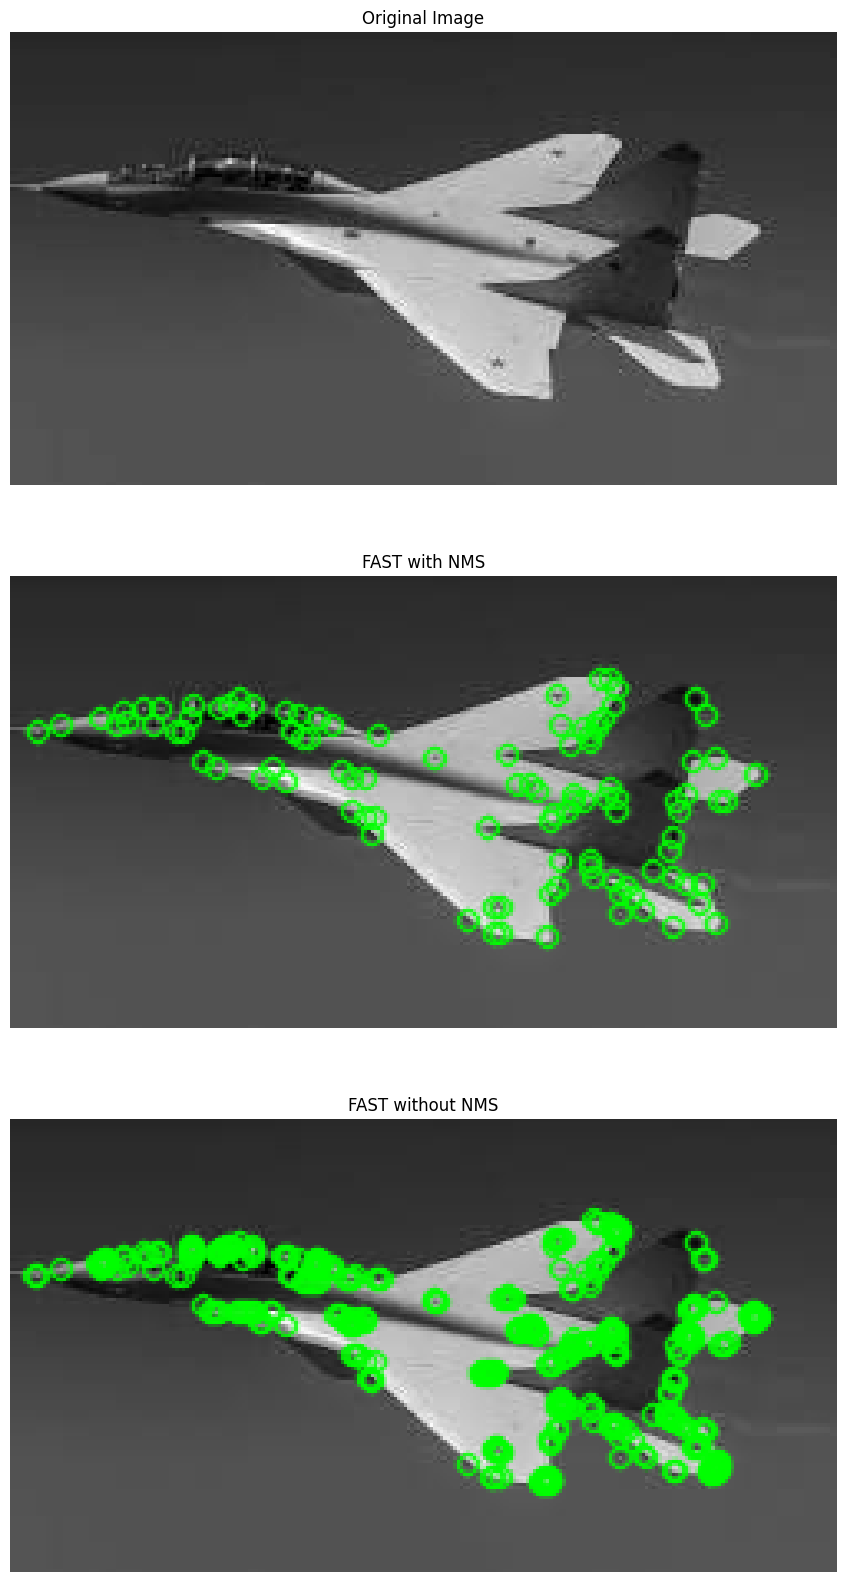

In [3]:
# Load image in grayscale
img = cv2.imread('/kaggle/input/plane-pic/download (3).jfif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Image not found.")
    exit()

# Initialize FAST with non-maximum suppression
fast_nms = cv2.FastFeatureDetector_create(threshold=25, nonmaxSuppression=True)
keypoints_nms = fast_nms.detect(img, None)

# Initialize FAST without non-maximum suppression
fast_no_nms = cv2.FastFeatureDetector_create(threshold=25, nonmaxSuppression=False)
keypoints_no_nms = fast_no_nms.detect(img, None)

# Draw keypoints
img_nms = cv2.drawKeypoints(img, keypoints_nms, None, color=(0, 255, 0))
img_no_nms = cv2.drawKeypoints(img, keypoints_no_nms, None, color=(0, 255, 0))

# Display results
plt.figure(figsize=(15,20))

plt.subplot(3,1, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.title('FAST with NMS')
plt.imshow(img_nms, cmap='gray')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.title('FAST without NMS')
plt.imshow(img_no_nms, cmap='gray')
plt.axis('off')

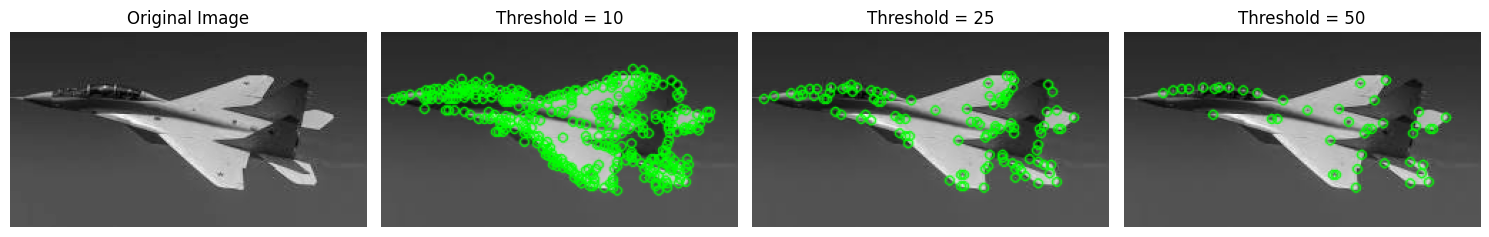

In [4]:
# Load image in grayscale
img = cv2.imread('/kaggle/input/plane-pic/download (3).jfif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Image not found.")
    exit()

# Initialize FAST with different thresholds
thresholds = [10, 25, 50]
img_keypoints = []

for thresh in thresholds:
    fast = cv2.FastFeatureDetector_create(threshold=thresh, nonmaxSuppression=True)
    keypoints = fast.detect(img, None)
    img_kp = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0))
    img_keypoints.append(img_kp)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

for i, thresh in enumerate(thresholds):
    plt.subplot(1, 4, i + 2)
    plt.title(f'Threshold = {thresh}')
    plt.imshow(img_keypoints[i], cmap='gray')
    plt.axis('off')
    
plt.tight_layout()